In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [79]:
#load the data
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [81]:
#Checking the data shape
print(f'THE DATASET HAS {df.shape[0]} rows and {df.shape[1]} columns')

THE DATASET HAS 8807 rows and 12 columns


In [82]:
# Checking the null values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [83]:
# Remove missing values from the DataFrame
netflix=df.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


**COUNTPLOT : MOVIES/SHOWS**

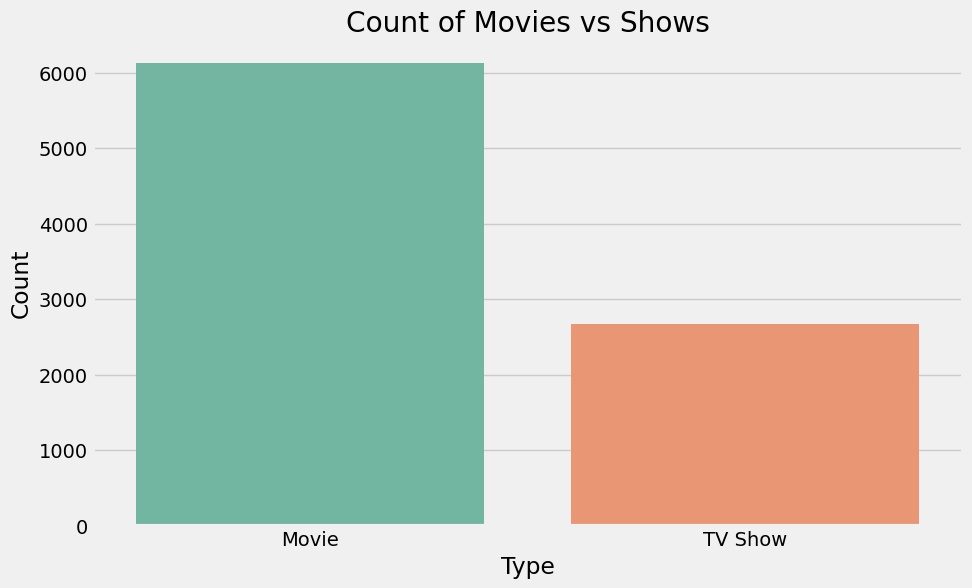

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

***HISTOPLOT OF RELEASE YEAR DISTRIBUTION***

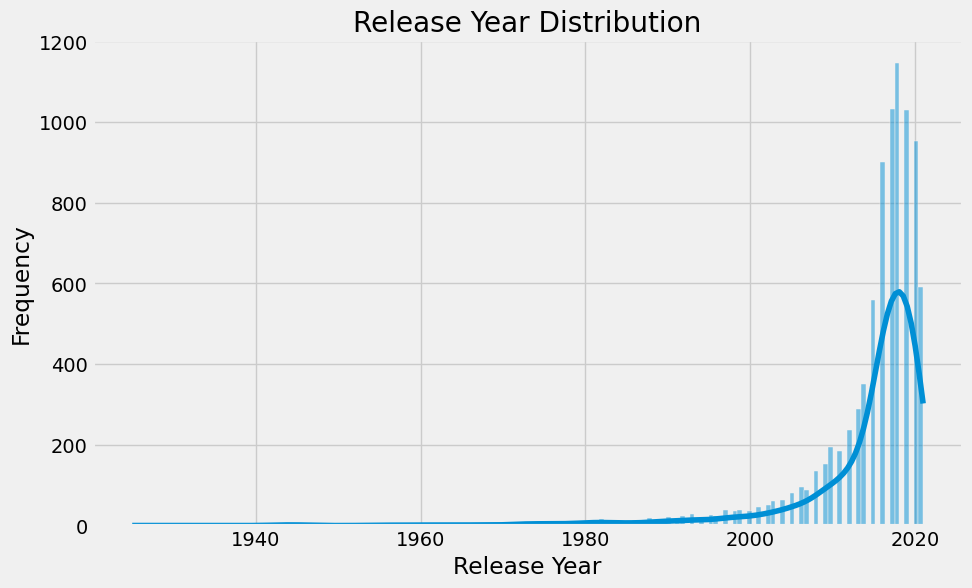

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', kde=True, palette='Set1')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

***COUNT PLOT OF RATING DISTRIBUTION***

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='Set3', order=df['rating'].value_counts().index)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**BAR-PLOT : TOP 5 COUNTRIES WITH MOST CONTENT**

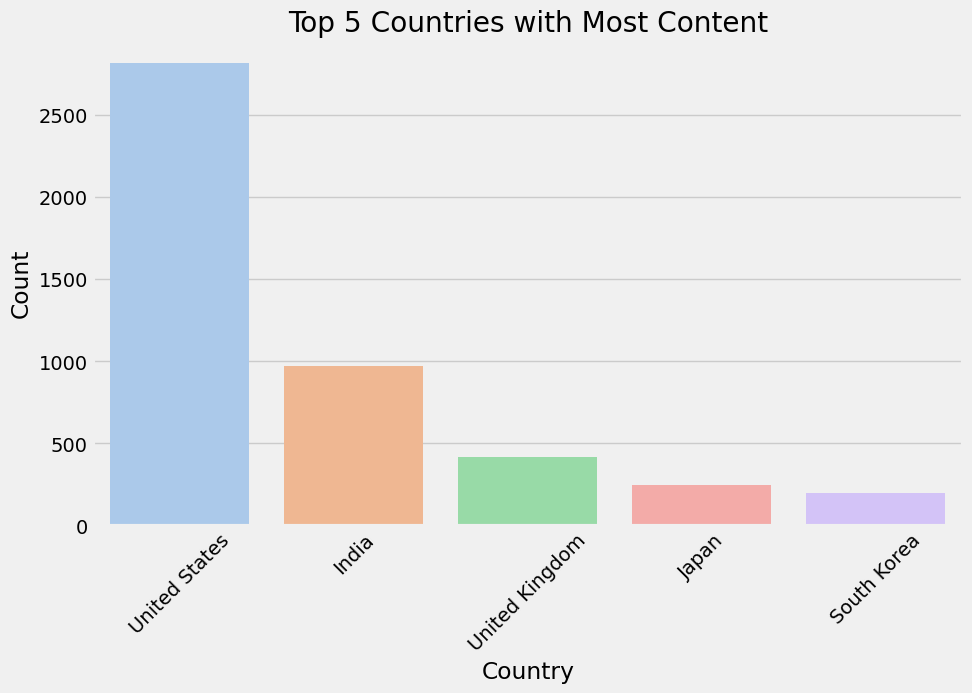

In [86]:
top_countries = df['country'].value_counts().head()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='pastel')
plt.title('Top 5 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**SCATTER PLOT : DURATION VS RELESE DATE**

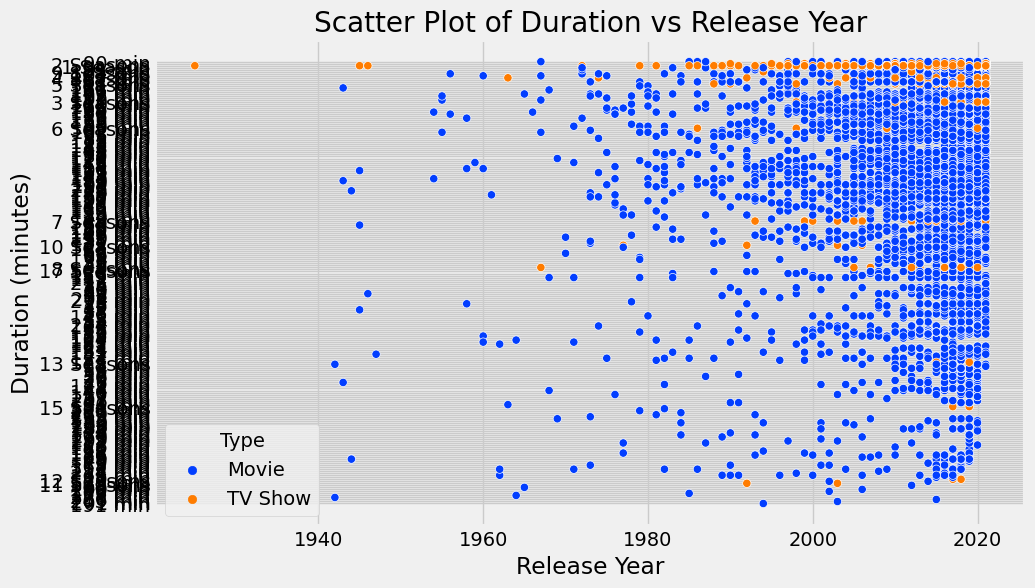

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='duration', hue='type', palette='bright')
plt.title('Scatter Plot of Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend(title='Type')
plt.grid(True)
plt.show()


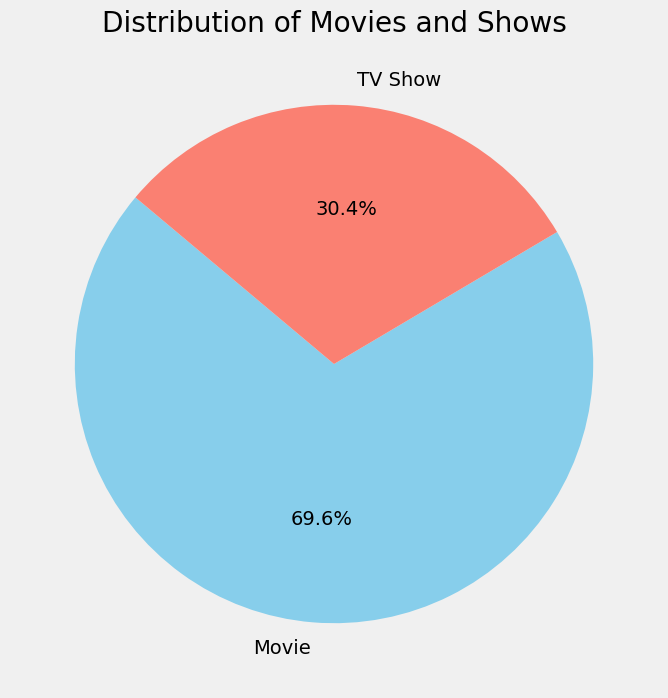

In [90]:
plt.figure(figsize=(8, 8))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Distribution of Movies and Shows')
plt.ylabel('')
plt.show()

**SUB-PLOT**

Text(0, 0.5, 'Average Release Year')

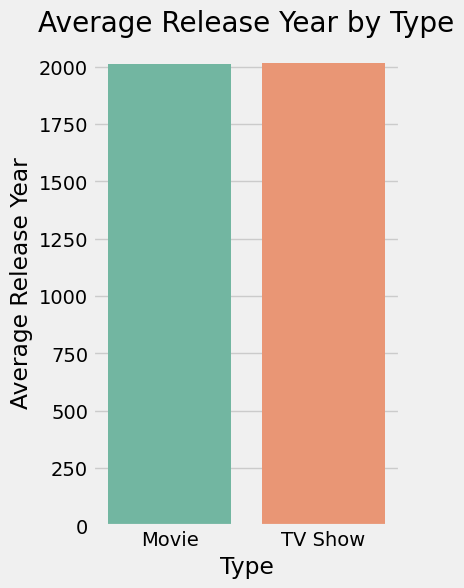

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='type', y='release_year', palette='Set2')
plt.title('Average Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Average Release Year')

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='rating', hue='type', palette='Set2')
plt.title('Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
summary_stats = df[['release_year', 'duration']].describe()
print(summary_stats)